In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date

import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *

In [24]:
homePath_train = "/home/giang/Documents/data1/"

In [25]:
chars = [chr(i) for i in range(65, 91)]
for i in range(0, 10):
    chars.append(str(i))
# print(len(chars))
# chars = [str(i) for i in range(0,10)]
NUM_TRAIN = 6500
NUM_VAL = 7300

In [26]:
chars

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [27]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
            img = cv2.imread(imgPath+ image,0)
            img = cv2.resize(img, (28, 28))
#             print(img.shape)
            data.append(img)
#             data.append(img.resize((28, 28)))
#             image.resize((28, 28)), dtype=np.float32
            label.append(i)
#             kk = kk + 1;
#             if kk == 311:
#                 break
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [28]:
data,label = preprocessdata(homePath_train)

/home/giang/Documents/data1/A/
/home/giang/Documents/data1/B/
/home/giang/Documents/data1/C/
/home/giang/Documents/data1/D/
/home/giang/Documents/data1/E/
/home/giang/Documents/data1/F/
/home/giang/Documents/data1/G/
/home/giang/Documents/data1/H/
/home/giang/Documents/data1/I/
/home/giang/Documents/data1/J/
/home/giang/Documents/data1/K/
/home/giang/Documents/data1/L/
/home/giang/Documents/data1/M/
/home/giang/Documents/data1/N/
/home/giang/Documents/data1/O/
/home/giang/Documents/data1/P/
/home/giang/Documents/data1/Q/
/home/giang/Documents/data1/R/
/home/giang/Documents/data1/S/
/home/giang/Documents/data1/T/
/home/giang/Documents/data1/U/
/home/giang/Documents/data1/V/
/home/giang/Documents/data1/W/
/home/giang/Documents/data1/X/
/home/giang/Documents/data1/Y/
/home/giang/Documents/data1/Z/
/home/giang/Documents/data1/0/
/home/giang/Documents/data1/1/
/home/giang/Documents/data1/2/
/home/giang/Documents/data1/3/
/home/giang/Documents/data1/4/
/home/giang/Documents/data1/5/
/home/gi

In [29]:
x = data
y = label

In [30]:
size(label)

<ipython-input-30-7338560c4d8c>:1: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  size(label)


72000

In [31]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_tt = y_test

In [33]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 36)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 36)

<ipython-input-33-09a114b85578>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-33-09a114b85578>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
                 batch_size=32, epochs=70, verbose=1)


Train on 46080 samples, validate on 11520 samples
Epoch 1/70
46080/46080 [==============================] - 49s 1ms/step - loss: 1.2468 - accuracy: 0.6887 - val_loss: 0.5559 - val_accuracy: 0.8463
Epoch 2/70
46080/46080 [==============================] - 57s 1ms/step - loss: 0.4481 - accuracy: 0.8720 - val_loss: 0.4045 - val_accuracy: 0.8799
Epoch 3/70
46080/46080 [==============================] - 52s 1ms/step - loss: 0.3339 - accuracy: 0.8997 - val_loss: 0.3683 - val_accuracy: 0.8884
Epoch 4/70
46080/46080 [==============================] - 50s 1ms/step - loss: 0.2738 - accuracy: 0.9154 - val_loss: 0.3329 - val_accuracy: 0.8979
Epoch 5/70
46080/46080 [==============================] - 51s 1ms/step - loss: 0.2340 - accuracy: 0.9264 - val_loss: 0.2979 - val_accuracy: 0.9074
Epoch 6/70
46080/46080 [==============================] - 51s 1ms/step - loss: 0.2017 - accuracy: 0.9353 - val_loss: 0.2778 - val_accuracy: 0.9137
Epoch 7/70
46080/46080 [==============================] - 51s 1ms/st

46080/46080 [==============================] - 55s 1ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.4508 - val_accuracy: 0.9058
Epoch 57/70
46080/46080 [==============================] - 53s 1ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.4474 - val_accuracy: 0.9067
Epoch 58/70
46080/46080 [==============================] - 50s 1ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.4427 - val_accuracy: 0.9062
Epoch 59/70
46080/46080 [==============================] - 52s 1ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.4709 - val_accuracy: 0.9000
Epoch 60/70
46080/46080 [==============================] - 46s 992us/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.4606 - val_accuracy: 0.9030
Epoch 61/70
46080/46080 [==============================] - 46s 996us/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.4373 - val_accuracy: 0.9082
Epoch 62/70
46080/46080 [==============================] - 46s 997us/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.4911788079775094, 0.9047916531562805]

In [36]:
results = chars.copy()

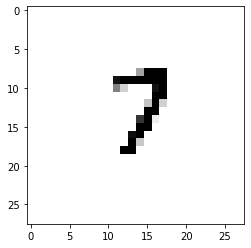

In [37]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [38]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__


'7'

In [39]:
kq = model.predict(X_test)
kq

array([[2.8112224e-14, 9.0292166e-16, 1.4806274e-18, ..., 1.0000000e+00,
        1.3775077e-12, 4.4134094e-08],
       [2.9092346e-15, 2.3828530e-13, 7.9871107e-19, ..., 1.3946276e-20,
        4.7831865e-08, 8.0756300e-17],
       [3.4362762e-07, 9.9999022e-01, 1.4798680e-10, ..., 1.9596238e-18,
        3.1853939e-09, 4.1624478e-15],
       ...,
       [2.8401614e-10, 4.8350631e-15, 4.4237210e-15, ..., 1.2240952e-03,
        3.2167244e-09, 9.9876559e-01],
       [5.0152090e-17, 5.6599195e-15, 7.5640058e-19, ..., 2.9898986e-11,
        4.4004297e-12, 1.4860699e-19],
       [7.3521462e-13, 4.8623969e-15, 1.7212287e-13, ..., 2.7372928e-15,
        6.9903328e-12, 4.6867828e-15]], dtype=float32)

In [40]:
resS = np.argmax(kq, axis=-1)
resS

array([33, 23,  1, ..., 35, 23, 16])

In [41]:
print(confusion_matrix(y_tt, resS))

[[358   3   0 ...   0   1   0]
 [  1 340   1 ...   1   8   0]
 [  0   0 375 ...   0   0   0]
 ...
 [  1   0   0 ... 394   0   3]
 [  0   8   0 ...   0 351   4]
 [  1   0   0 ...   2   0 420]]


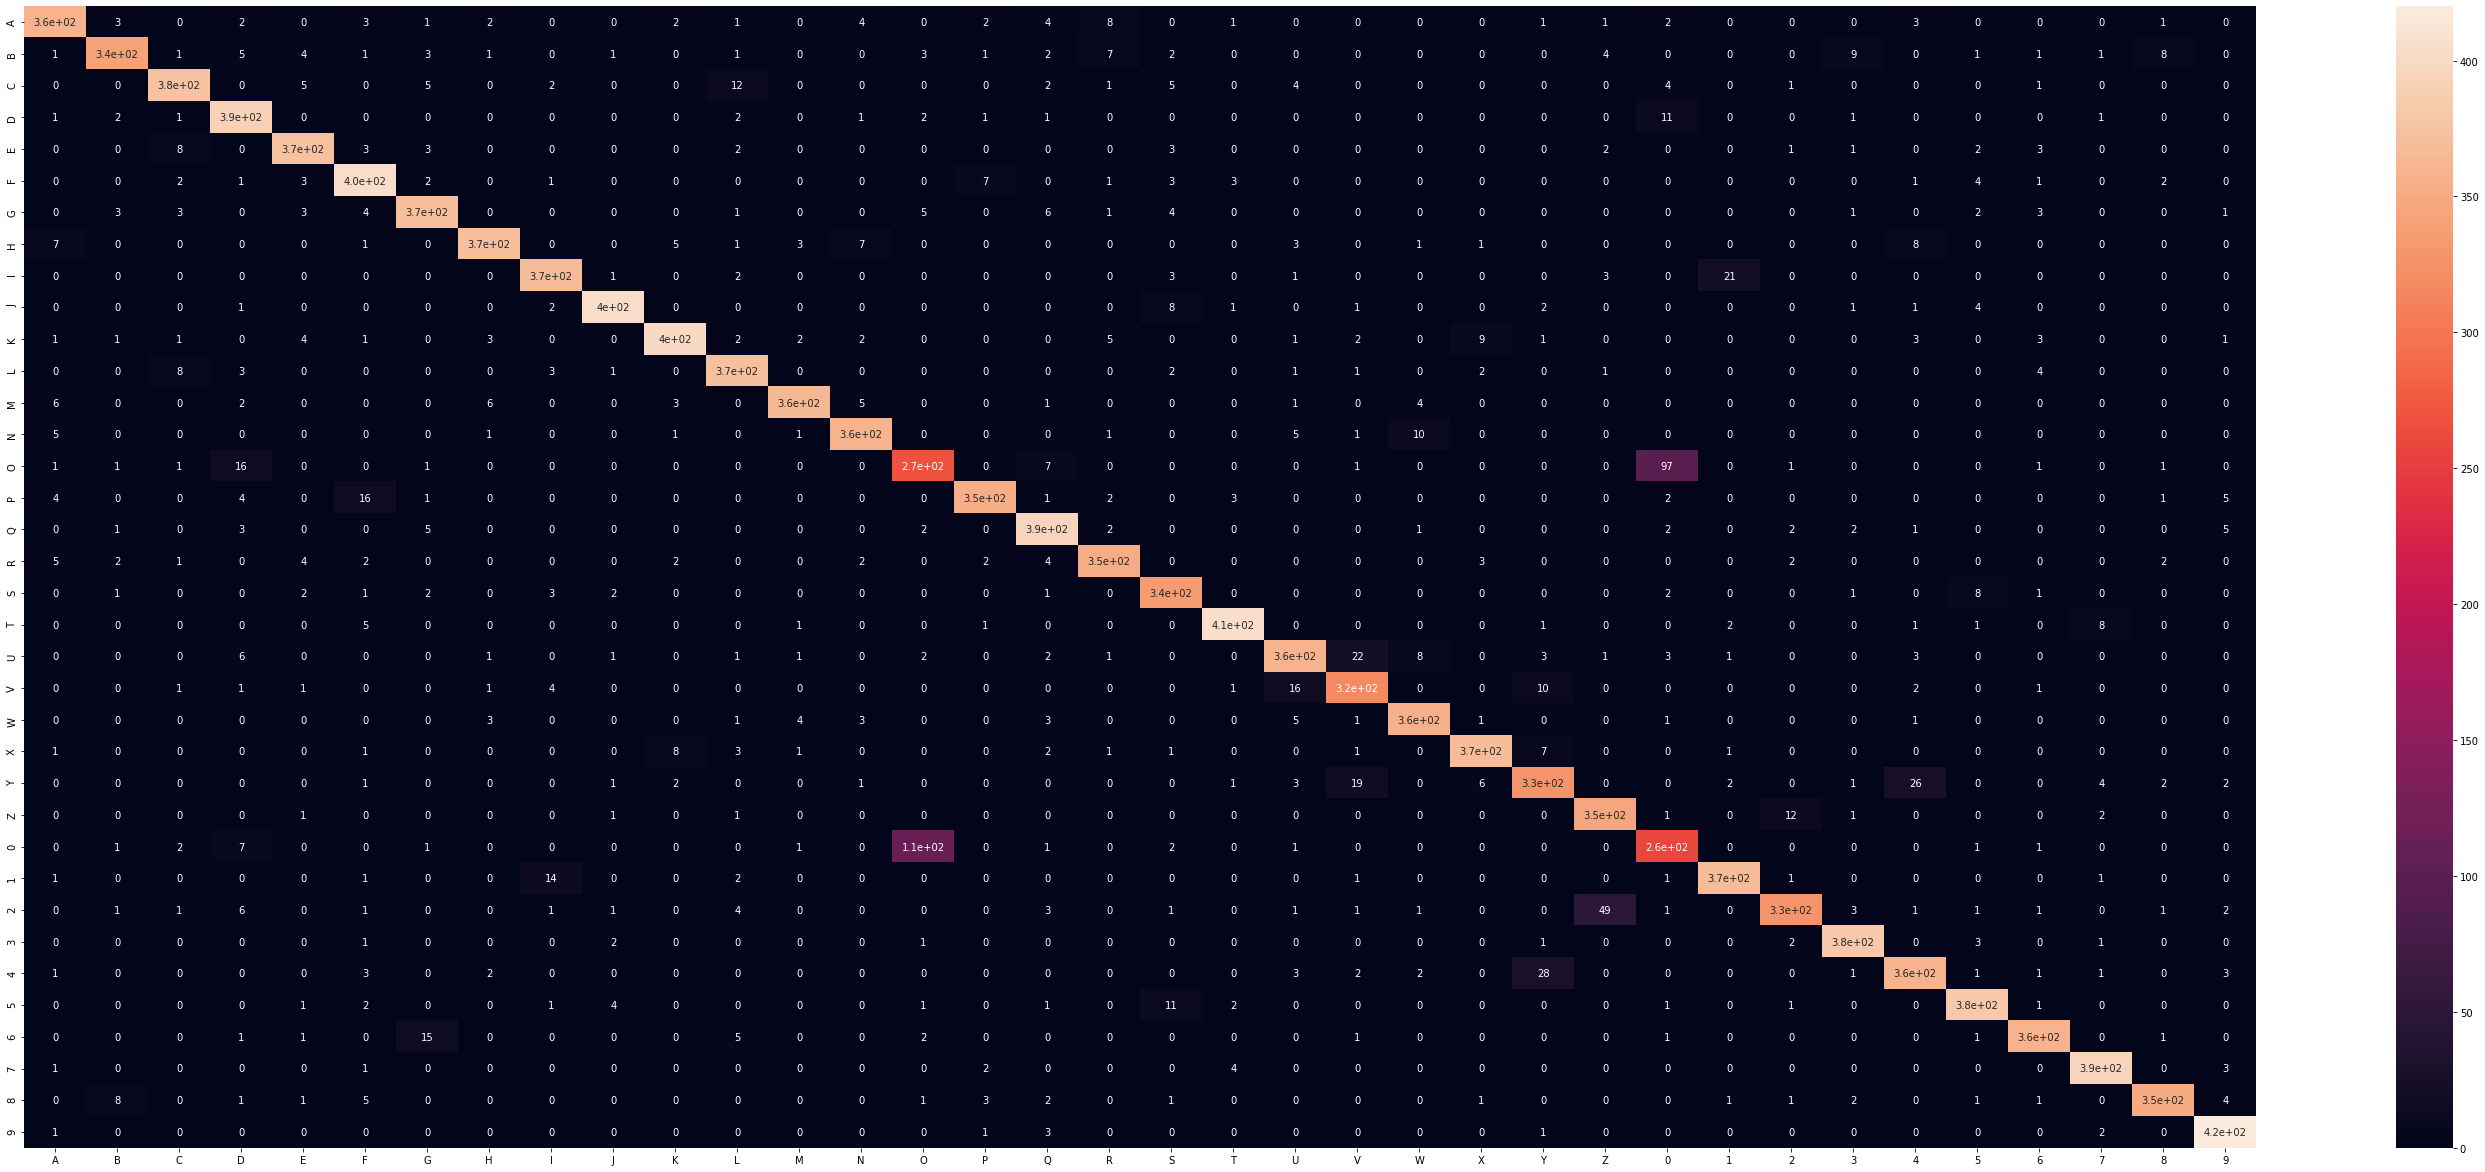

In [42]:
conf = confusion_matrix(y_tt, resS)
df_cm = pd.DataFrame(conf, index = [i for i in results],
                  columns = [i for i in results])
plt.figure(figsize = (50,21))
sns.heatmap(df_cm, annot=True)

In [43]:
print(classification_report(y_tt, resS, target_names=['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']))

              precision    recall  f1-score   support

           A       0.91      0.90      0.90       399
           B       0.93      0.86      0.89       397
           C       0.93      0.90      0.91       417
           D       0.87      0.94      0.90       416
           E       0.93      0.93      0.93       402
           F       0.88      0.93      0.91       436
           G       0.90      0.91      0.91       407
           H       0.95      0.91      0.93       407
           I       0.92      0.92      0.92       400
           J       0.96      0.95      0.96       425
           K       0.95      0.90      0.92       441
           L       0.90      0.93      0.92       398
           M       0.96      0.93      0.95       391
           N       0.93      0.93      0.93       384
           O       0.67      0.68      0.67       397
           P       0.95      0.90      0.92       392
           Q       0.90      0.94      0.92       420
           R       0.92    

In [44]:
a = 1.4e+02
a

140.0